In [1]:
# import necessary modules
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# set variable for file_path and data_dir
file_path = r"/Users/hemu/Desktop/Updated_work_on_Deep_Learning/Research_work_on_Deep_Learning/Pneumonia/chest_xray/Alzheimers_Image_data/dataset"
data_dir = pathlib.Path(file_path)

In [3]:
# Split train and validation data
SEED = 1234
BATCH_SIZE = 10
IMG_SIZE = (160,160)

train_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                         validation_split = 0.2,
                                                         subset = 'training',
                                                         seed = SEED,
                                                         image_size = IMG_SIZE,
                                                         batch_size = BATCH_SIZE,
                                                         shuffle = True
                                                         )

val_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       seed = SEED,
                                                       image_size = IMG_SIZE,
                                                       batch_size = BATCH_SIZE,
                                                       shuffle = True
                                                       )

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [4]:
print(f"total train data per batch: {len(train_data)}")
print(f"total validation data per batch: {len(val_data)}")

total train data per batch: 512
total validation data per batch: 128


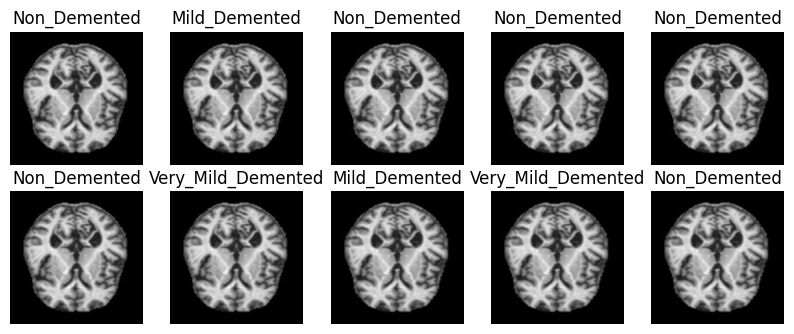

In [5]:
# set variable for class_names
class_names = train_data.class_names

# plot the train_data image
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[1].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [6]:
# Create prefetch dataset for better performance
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.prefetch(buffer_size=AUTOTUNE)
val_data = val_data.prefetch(buffer_size=AUTOTUNE)


In [7]:
# Preprocess image input
IMG_SHAPE = IMG_SIZE + (3,)
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=IMG_SHAPE),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Check the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 79, 79, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)       7

In [10]:
# Train the model
initial_epochs = 6
history = model.fit(train_data,
                    epochs=initial_epochs,
                    validation_data=val_data)

Epoch 1/6


512/512 [==============================] - 74s 145ms/step - loss: 0.9330 - accuracy: 0.5611 - val_loss: 0.8055 - val_accuracy: 0.6242
Epoch 2/6
512/512 [==============================] - 71s 138ms/step - loss: 0.6598 - accuracy: 0.7186 - val_loss: 0.5732 - val_accuracy: 0.7570
Epoch 3/6
512/512 [==============================] - 74s 144ms/step - loss: 0.3332 - accuracy: 0.8627 - val_loss: 0.2997 - val_accuracy: 0.8930
Epoch 4/6
512/512 [==============================] - 65s 128ms/step - loss: 0.1461 - accuracy: 0.9469 - val_loss: 0.2687 - val_accuracy: 0.9078
Epoch 5/6
512/512 [==============================] - 53s 104ms/step - loss: 0.0783 - accuracy: 0.9705 - val_loss: 0.1265 - val_accuracy: 0.9602
Epoch 6/6
512/512 [==============================] - 57s 112ms/step - loss: 0.0578 - accuracy: 0.9783 - val_loss: 0.1306 - val_accuracy: 0.9539


In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(val_data)
print("---------------------------------------------After Training---------------------------------------------")
print("Loss:", loss)
print("Accuracy:", accuracy)

  1/128 [..............................] - ETA: 6s - loss: 0.2068 - accuracy: 0.9000

128/128 [==============================] - 4s 31ms/step - loss: 0.1306 - accuracy: 0.9539
---------------------------------------------After Training---------------------------------------------
Loss: 0.13059565424919128
Accuracy: 0.953906238079071


In [12]:
# Use test data to make predictions
test_data = val_data.take(1)  # Assuming you want to use the first batch of validation data for testing
image_batch, label_batch = next(iter(test_data))
predictions = model.predict_on_batch(image_batch)
class_predictions = np.argmax(predictions, axis=1)


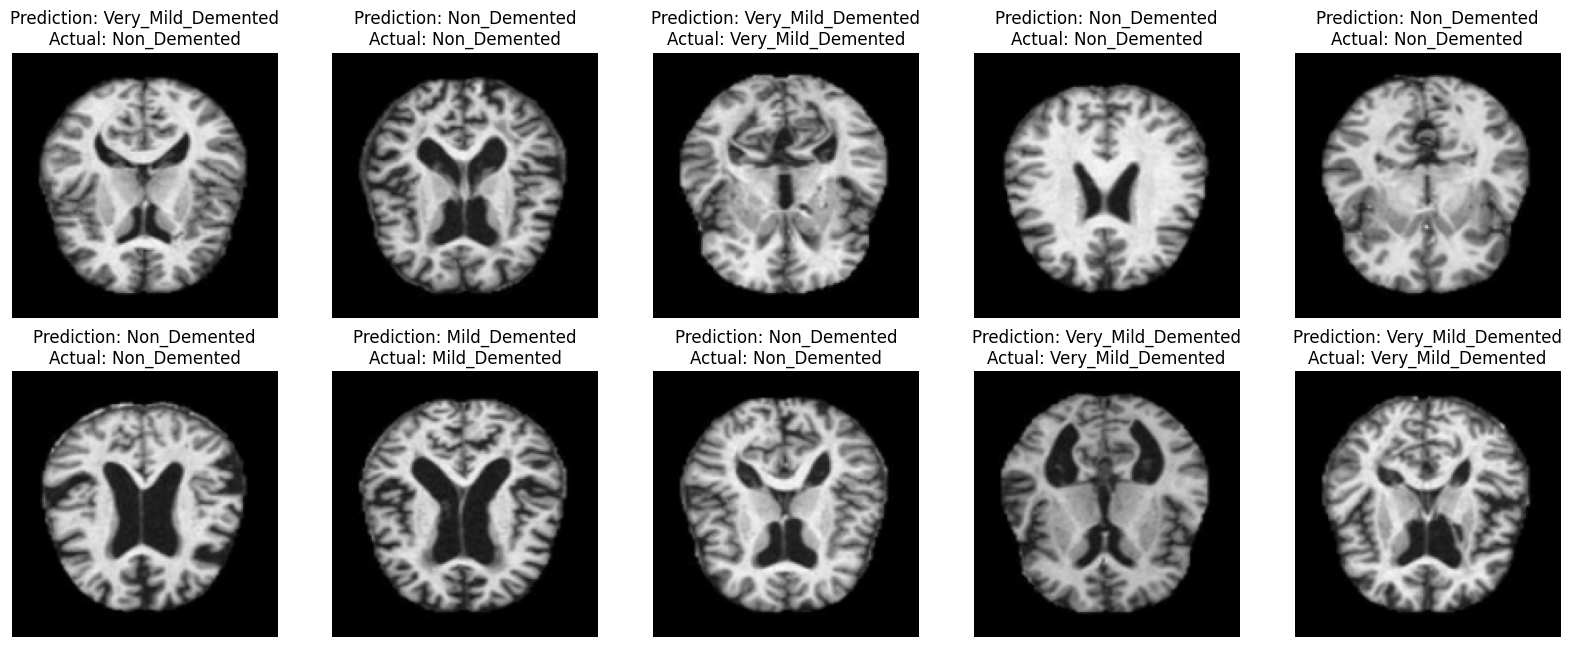

In [13]:
# Plot the predictions vs actual labels
plt.figure(figsize=(20, 20))
for i in range(len(image_batch)):
    plt.subplot(5, 5, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(f"Prediction: {class_names[class_predictions[i]]}\nActual: {class_names[label_batch[i]]}")
    plt.axis('off')

plt.show()

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd

# Initialize empty arrays to store predictions and labels
all_predictions = []
all_labels = []

# Iterate through all batches in the test data
for image_batch, label_batch in test_data.as_numpy_iterator():
    predictions = model.predict_on_batch(image_batch)
    class_predictions = np.argmax(predictions, axis=1)
    
    # Append current batch predictions and labels to the arrays
    all_predictions.extend(class_predictions)
    all_labels.extend(label_batch)

# Convert the lists to numpy arrays for easy calculation
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Plot Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, show_normed=False, colorbar=True, class_names=class_names)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(all_labels, all_predictions, target_names=class_names)
print("Classification Report:")
print(class_report)


ValueError: Shape of passed values is (3, 3), indices imply (4, 4)

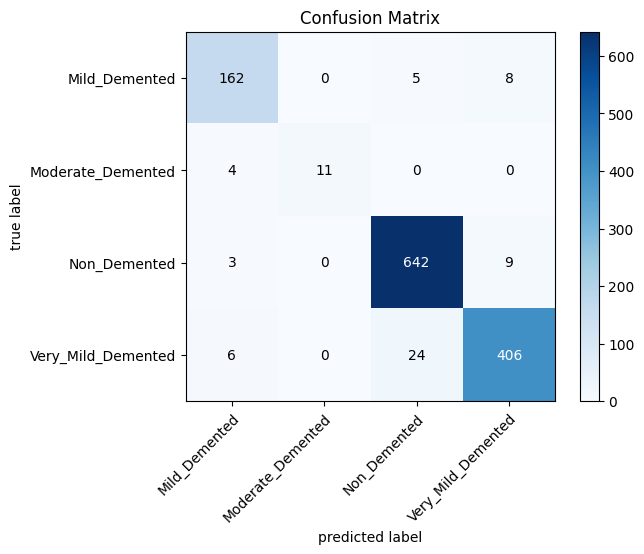

Classification Report:
                    precision    recall  f1-score   support

     Mild_Demented       0.93      0.93      0.93       175
 Moderate_Demented       1.00      0.73      0.85        15
      Non_Demented       0.96      0.98      0.97       654
Very_Mild_Demented       0.96      0.93      0.95       436

          accuracy                           0.95      1280
         macro avg       0.96      0.89      0.92      1280
      weighted avg       0.95      0.95      0.95      1280



In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd

# Initialize empty arrays to store predictions and labels
all_predictions = []
all_labels = []

# Iterate through all batches in the test data
for image_batch, label_batch in val_data.as_numpy_iterator():  # Use val_data instead of test_data
    predictions = model.predict_on_batch(image_batch)
    class_predictions = np.argmax(predictions, axis=1)
    
    # Append current batch predictions and labels to the arrays
    all_predictions.extend(class_predictions)
    all_labels.extend(label_batch)

# Convert the lists to numpy arrays for easy calculation
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Plot Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, show_normed=False, colorbar=True, class_names=class_names)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(all_labels, all_predictions, target_names=class_names)
print("Classification Report:")
print(class_report)


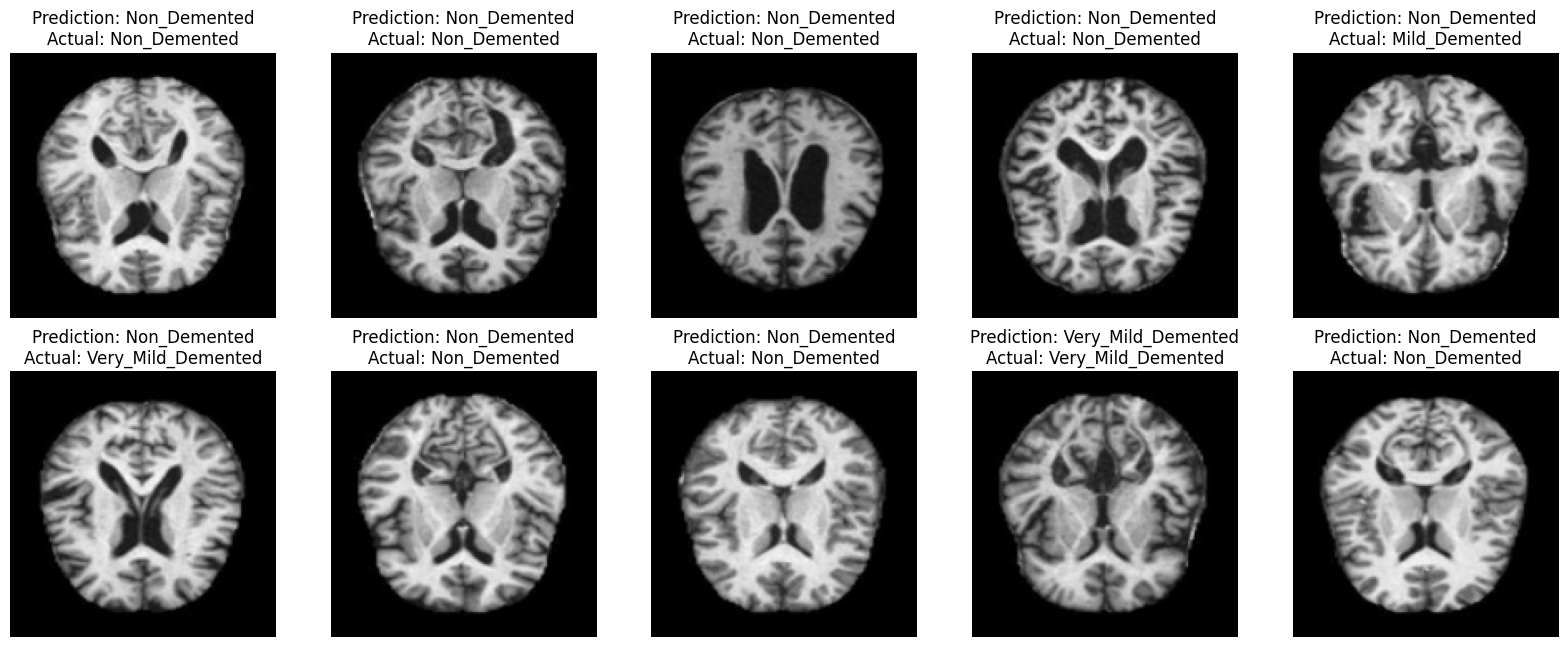

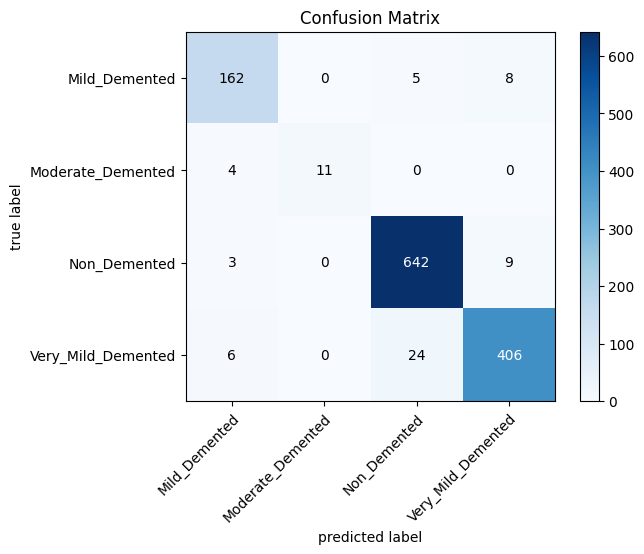

Classification Report:
                    precision    recall  f1-score   support

     Mild_Demented       0.93      0.93      0.93       175
 Moderate_Demented       1.00      0.73      0.85        15
      Non_Demented       0.96      0.98      0.97       654
Very_Mild_Demented       0.96      0.93      0.95       436

          accuracy                           0.95      1280
         macro avg       0.96      0.89      0.92      1280
      weighted avg       0.95      0.95      0.95      1280



In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd

# ... (your complete code before this point)

# Use test data to make predictions
test_data = val_data.take(1)  # Assuming you want to use the first batch of validation data for testing
image_batch, label_batch = next(iter(test_data))
predictions = model.predict_on_batch(image_batch)
class_predictions = np.argmax(predictions, axis=1)

# Plot the predictions vs actual labels
plt.figure(figsize=(20, 20))
for i in range(len(image_batch)):
    plt.subplot(5, 5, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(f"Prediction: {class_names[class_predictions[i]]}\nActual: {class_names[label_batch[i]]}")
    plt.axis('off')

plt.show()

# Initialize empty arrays to store predictions and labels
all_predictions = []
all_labels = []

# Iterate through all batches in the test data
for image_batch, label_batch in val_data.as_numpy_iterator():
    predictions = model.predict_on_batch(image_batch)
    class_predictions = np.argmax(predictions, axis=1)
    
    # Append current batch predictions and labels to the arrays
    all_predictions.extend(class_predictions)
    all_labels.extend(label_batch)

# Convert the lists to numpy arrays for easy calculation
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Plot Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, show_normed=False, colorbar=True, class_names=class_names)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(all_labels, all_predictions, target_names=class_names)
print("Classification Report:")
print(class_report)


In [19]:
epochs_range = range(1, initial_epochs + 1)

Text(0, 0.5, 'Accuracy')

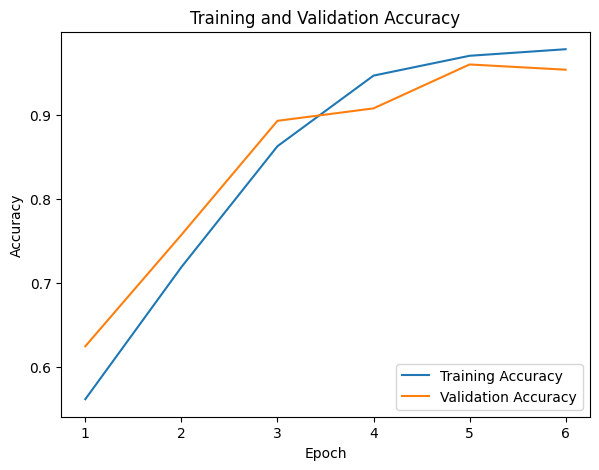

In [21]:
# Plot accuracy and loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, initial_epochs + 1)

# Plot Accuracy
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

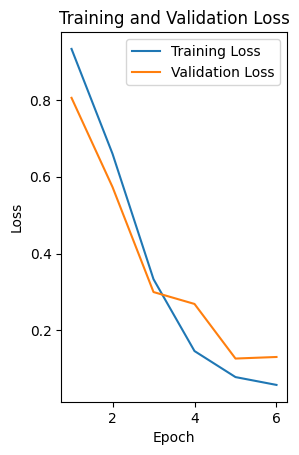

In [22]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()